In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
hongdae = pd.read_csv('../data/홍대입구 일별 시간대별 승객유형별 승하차인원 (1).csv')
hongdae.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,13-14시간대,14-15시간대,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년
0,2022-06-01,2.0,239,홍대입구,승차,일반,1159,632,532,703,876,936,1178,1676,1968,2347,3045,3880,4048,3889,3697,4725,5441,5282,2126,8.0,6,2022
1,2022-06-01,2.0,239,홍대입구,승차,어린이,1,0,2,3,5,1,20,29,52,63,101,99,97,67,53,30,18,6,0,0.0,6,2022
2,2022-06-01,2.0,239,홍대입구,승차,중고생,0,1,0,0,4,0,0,0,0,2,2,2,0,6,2,1,2,1,1,0.0,6,2022
3,2022-06-01,2.0,239,홍대입구,승차,청소년,43,30,21,20,32,27,80,109,203,344,539,683,755,724,661,660,595,455,120,0.0,6,2022
4,2022-06-01,2.0,239,홍대입구,승차,우대권,74,86,71,125,161,167,171,150,150,172,157,187,165,109,103,86,88,78,24,0.0,6,2022


### 승객유형 일반/미성년자/우대권/외국인 으로 단순화

In [51]:
hongdae.승객유형.unique()

array(['일반', '어린이', '중고생', '청소년', '우대권', '영어 일반', '일어 일반', '중국어 일반',
       '영어 어린이', '중국어 어린이', '일어 어린이', '직원'], dtype=object)

In [52]:
def sumType(df, target, *add):
    print(add)
    for idx, row in df[df['승객유형'].isin(add)].iterrows():
        # 동일한 수송일자의 '일반' 승객 찾기
        general_idx = df[(df['수송일자'] == row['수송일자']) & (df['승객유형'] == target)].index
        if len(general_idx) > 0:
            # 각 시간대별 값 합하기
            for i in ['06시간대이전', '06-07시간대',
        '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
        '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
        '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후']:
                df.at[general_idx[0], i] += row[i]
            df.drop(index=idx, inplace=True)

    # 인덱스 리셋
    df.reset_index(drop=True, inplace=True)

    return df

In [53]:
sumType(hongdae, '청소년', '어린이', '중고생')

('어린이', '중고생')


,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,13-14시간대,14-15시간대,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년
0,2022-06-01,2.0,239,홍대입구,승차,일반,1159,632,532,703,876,936,1178,1676,1968,2347,3045,3880,4048,3889,3697,4725,5441,5282,2126,8.0,6,2022
1,2022-06-01,2.0,239,홍대입구,승차,청소년,44,34,24,29,67,94,233,235,348,489,714,833,879,818,723,698,624,466,124,0.0,6,2022
2,2022-06-01,2.0,239,홍대입구,승차,우대권,74,86,71,125,161,167,171,150,150,172,157,187,165,109,103,86,88,78,24,0.0,6,2022
3,2022-06-01,2.0,239,홍대입구,승차,영어 일반,1,0,1,0,0,7,6,4,3,5,6,8,4,6,1,6,1,20,9,0.0,6,2022
4,2022-06-01,2.0,239,홍대입구,승차,일어 일반,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,6,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13477,2024-05-31,2.0,239,홍대입구,하차,일어 일반,0,0,3,0,2,7,9,5,10,16,9,11,18,15,3,2,2,2,6,0.0,5,2024
13478,2024-05-31,2.0,239,홍대입구,하차,중국어 일반,0,0,0,5,8,3,15,11,37,18,22,28,30,29,33,18,30,14,14,9.0,5,2024
13479,2024-05-31,2.0,239,홍대입구,하차,영어 어린이,0,0,2,1,2,0,0,2,3,1,5,6,4,2,8,2,5,2,5,0.0,5,2024
13480,2024-05-31,2.0,239,홍대입구,하차,일어 어린이,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,0.0,5,2024


In [54]:
hongdae.승객유형.unique()

array(['일반', '청소년', '우대권', '영어 일반', '일어 일반', '중국어 일반', '영어 어린이',
       '중국어 어린이', '일어 어린이', '직원'], dtype=object)

In [55]:
sumType(hongdae,'영어 일반', '일어 일반', '중국어 일반', '영어 어린이', '중국어 어린이', '일어 어린이')
hongdae.승객유형.unique()

('일어 일반', '중국어 일반', '영어 어린이', '중국어 어린이', '일어 어린이')


array(['일반', '청소년', '우대권', '영어 일반', '직원'], dtype=object)

In [56]:
sumType(hongdae, '일반','직원')

('직원',)


,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,13-14시간대,14-15시간대,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년
0,2022-06-01,2.0,239,홍대입구,승차,일반,1159,632,532,703,876,936,1178,1676,1968,2347,3045,3880,4048,3889,3697,4725,5441,5282,2126,8.0,6,2022
1,2022-06-01,2.0,239,홍대입구,승차,청소년,44,34,24,29,67,94,233,235,348,489,714,833,879,818,723,698,624,466,124,0.0,6,2022
2,2022-06-01,2.0,239,홍대입구,승차,우대권,74,86,71,125,161,167,171,150,150,172,157,187,165,109,103,86,88,78,24,0.0,6,2022
3,2022-06-01,2.0,239,홍대입구,승차,영어 일반,1,0,1,0,0,7,8,4,3,5,9,10,6,8,3,7,6,23,11,0.0,6,2022
4,2022-06-01,2.0,239,홍대입구,하차,일반,93,344,410,763,1559,2248,3878,4874,4998,5171,4828,4188,4161,3708,2439,1847,1679,1280,922,245.0,6,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,2024-05-31,2.0,239,홍대입구,승차,영어 일반,8,8,10,30,29,60,72,56,82,65,78,100,95,104,118,105,91,103,75,15.0,5,2024
5844,2024-05-31,2.0,239,홍대입구,하차,일반,96,513,1502,4560,4996,3333,3245,3569,4415,3974,4037,5319,6501,9226,7565,3955,3516,3296,2399,1300.0,5,2024
5845,2024-05-31,2.0,239,홍대입구,하차,청소년,1,8,100,60,97,95,88,122,177,183,252,399,455,375,256,138,122,99,75,39.0,5,2024
5846,2024-05-31,2.0,239,홍대입구,하차,우대권,53,183,172,217,273,242,227,269,266,223,308,292,287,260,200,101,103,68,30,13.0,5,2024


In [57]:
hongdae.rename(columns={'영어 일반':'외국인'},inplace=True)

In [58]:
hongdae.drop(
    ['호선명','역번호','역명'],
    axis=1,
    inplace=True
)
hongdae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   수송일자      5848 non-null   object 
 1   승하차구분     5848 non-null   object 
 2   승객유형      5848 non-null   object 
 3   06시간대이전   5848 non-null   int64  
 4   06-07시간대  5848 non-null   int64  
 5   07-08시간대  5848 non-null   int64  
 6   08-09시간대  5848 non-null   int64  
 7   09-10시간대  5848 non-null   int64  
 8   10-11시간대  5848 non-null   int64  
 9   11-12시간대  5848 non-null   int64  
 10  12-13시간대  5848 non-null   int64  
 11  13-14시간대  5848 non-null   int64  
 12  14-15시간대  5848 non-null   int64  
 13  15-16시간대  5848 non-null   int64  
 14  16-17시간대  5848 non-null   int64  
 15  17-18시간대  5848 non-null   int64  
 16  18-19시간대  5848 non-null   int64  
 17  19-20시간대  5848 non-null   int64  
 18  20-21시간대  5848 non-null   int64  
 19  21-22시간대  5848 non-null   int64  
 20  22-23시간대  5848 non-null   int6

In [59]:
# melt 함수 적용
hongdae_time = pd.melt(
    hongdae,
    # id_vars: 유지할 컬럼들
    id_vars=['수송일자', '승하차구분', '승객유형', '월', '년'],
    # var_name: 시간대 컬럼명
    var_name='시간대',
    # value_name: 승객수 컬럼명
    value_name='승객수'
)

In [60]:
hongdae_time.head()

,수송일자,승하차구분,승객유형,월,년,시간대,승객수
0,2022-06-01,승차,일반,6,2022,06시간대이전,1159.0
1,2022-06-01,승차,청소년,6,2022,06시간대이전,44.0
2,2022-06-01,승차,우대권,6,2022,06시간대이전,74.0
3,2022-06-01,승차,영어 일반,6,2022,06시간대이전,1.0
4,2022-06-01,하차,일반,6,2022,06시간대이전,93.0


In [61]:
hongdae_time.시간대.unique()

array(['06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
       '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
       '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
       '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'],
      dtype=object)

### melt 시간대 row 변환

In [62]:
def convert_time_to_int(time_slot):
    if '이전' in time_slot:
        return 5
    elif '이후' in time_slot:
        return 24
    else:
        # '-' 구분자로 시간을 분리하고 첫 번째 시간을 정수로 변환
        return int(time_slot.split('-')[0].replace('시간대', ''))

# 시간대 컬럼에 함수 적용
hongdae_time['time'] = hongdae_time['시간대'].map(convert_time_to_int)

In [63]:
hongdae_time.head()

,수송일자,승하차구분,승객유형,월,년,시간대,승객수,time
0,2022-06-01,승차,일반,6,2022,06시간대이전,1159.0,5
1,2022-06-01,승차,청소년,6,2022,06시간대이전,44.0,5
2,2022-06-01,승차,우대권,6,2022,06시간대이전,74.0,5
3,2022-06-01,승차,영어 일반,6,2022,06시간대이전,1.0,5
4,2022-06-01,하차,일반,6,2022,06시간대이전,93.0,5


In [64]:
hongdae_time.time.unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])

In [65]:
hongdae_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116960 entries, 0 to 116959
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수송일자    116960 non-null  object 
 1   승하차구분   116960 non-null  object 
 2   승객유형    116960 non-null  object 
 3   월       116960 non-null  int64  
 4   년       116960 non-null  int64  
 5   시간대     116960 non-null  object 
 6   승객수     116960 non-null  float64
 7   time    116960 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 7.1+ MB


In [66]:
hongdae_time['date']=pd.to_datetime(hongdae_time['수송일자'])
hongdae_time.head()

,수송일자,승하차구분,승객유형,월,년,시간대,승객수,time,date
0,2022-06-01,승차,일반,6,2022,06시간대이전,1159.0,5,2022-06-01
1,2022-06-01,승차,청소년,6,2022,06시간대이전,44.0,5,2022-06-01
2,2022-06-01,승차,우대권,6,2022,06시간대이전,74.0,5,2022-06-01
3,2022-06-01,승차,영어 일반,6,2022,06시간대이전,1.0,5,2022-06-01
4,2022-06-01,하차,일반,6,2022,06시간대이전,93.0,5,2022-06-01


In [67]:
hongdae_time.drop(
    ['수송일자','시간대'],
    axis=1,
    inplace=True
)
hongdae_time.head()

,승하차구분,승객유형,월,년,승객수,time,date
0,승차,일반,6,2022,1159.0,5,2022-06-01
1,승차,청소년,6,2022,44.0,5,2022-06-01
2,승차,우대권,6,2022,74.0,5,2022-06-01
3,승차,영어 일반,6,2022,1.0,5,2022-06-01
4,하차,일반,6,2022,93.0,5,2022-06-01


In [68]:
hongdae_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116960 entries, 0 to 116959
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   승하차구분   116960 non-null  object        
 1   승객유형    116960 non-null  object        
 2   월       116960 non-null  int64         
 3   년       116960 non-null  int64         
 4   승객수     116960 non-null  float64       
 5   time    116960 non-null  int64         
 6   date    116960 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [69]:
hongdae_time.rename(
    # axis=1,
    columns={'년':'연도'},
    inplace=True
)

hongdae_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116960 entries, 0 to 116959
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   승하차구분   116960 non-null  object        
 1   승객유형    116960 non-null  object        
 2   월       116960 non-null  int64         
 3   연도      116960 non-null  int64         
 4   승객수     116960 non-null  float64       
 5   time    116960 non-null  int64         
 6   date    116960 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [70]:
hongdae_time.loc[hongdae_time.승객유형 == '영어 일반', '승객유형'] = '외국인'

In [71]:
hongdae_time.head(20)

,승하차구분,승객유형,월,연도,승객수,time,date
0,승차,일반,6,2022,1159.0,5,2022-06-01
1,승차,청소년,6,2022,44.0,5,2022-06-01
2,승차,우대권,6,2022,74.0,5,2022-06-01
3,승차,외국인,6,2022,1.0,5,2022-06-01
4,하차,일반,6,2022,93.0,5,2022-06-01
5,하차,청소년,6,2022,2.0,5,2022-06-01
6,하차,우대권,6,2022,23.0,5,2022-06-01
7,하차,외국인,6,2022,0.0,5,2022-06-01
8,승차,일반,6,2022,565.0,5,2022-06-02
9,승차,청소년,6,2022,17.0,5,2022-06-02


---
### 요일 컬럼 추가

In [72]:
import holidays
# 대한민국 공휴일 불러오기
kr_holidays = holidays.KR(years=range(2022,2024))

In [73]:
days=["월", "화", "수", "목", "금", "토", "일"]

hongdae_time['day']=hongdae_time['date'].dt.weekday.map(dict(enumerate(days)))

In [74]:
hongdae_time.head()

,승하차구분,승객유형,월,연도,승객수,time,date,day
0,승차,일반,6,2022,1159.0,5,2022-06-01,수
1,승차,청소년,6,2022,44.0,5,2022-06-01,수
2,승차,우대권,6,2022,74.0,5,2022-06-01,수
3,승차,외국인,6,2022,1.0,5,2022-06-01,수
4,하차,일반,6,2022,93.0,5,2022-06-01,수


In [75]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

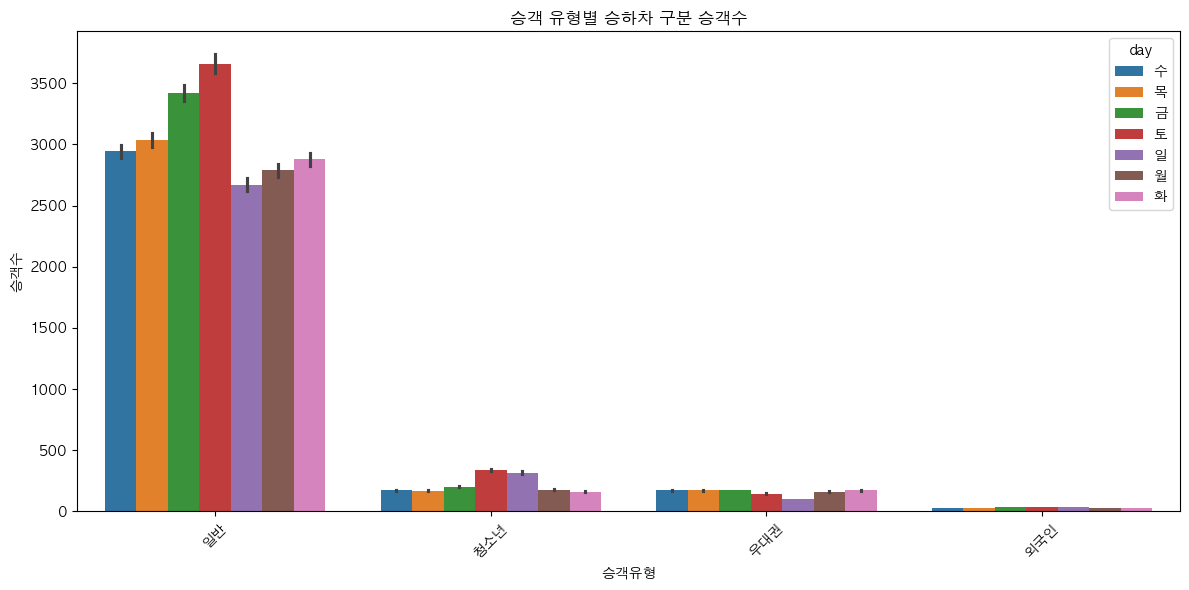

In [76]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# seaborn을 사용한 막대 그래프 생성
sns.barplot(data=hongdae_time, x='승객유형', y='승객수', hue='day')

# 그래프 제목과 레이블 설정
plt.title('승객 유형별 승하차 구분 승객수')
plt.xlabel('승객유형')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

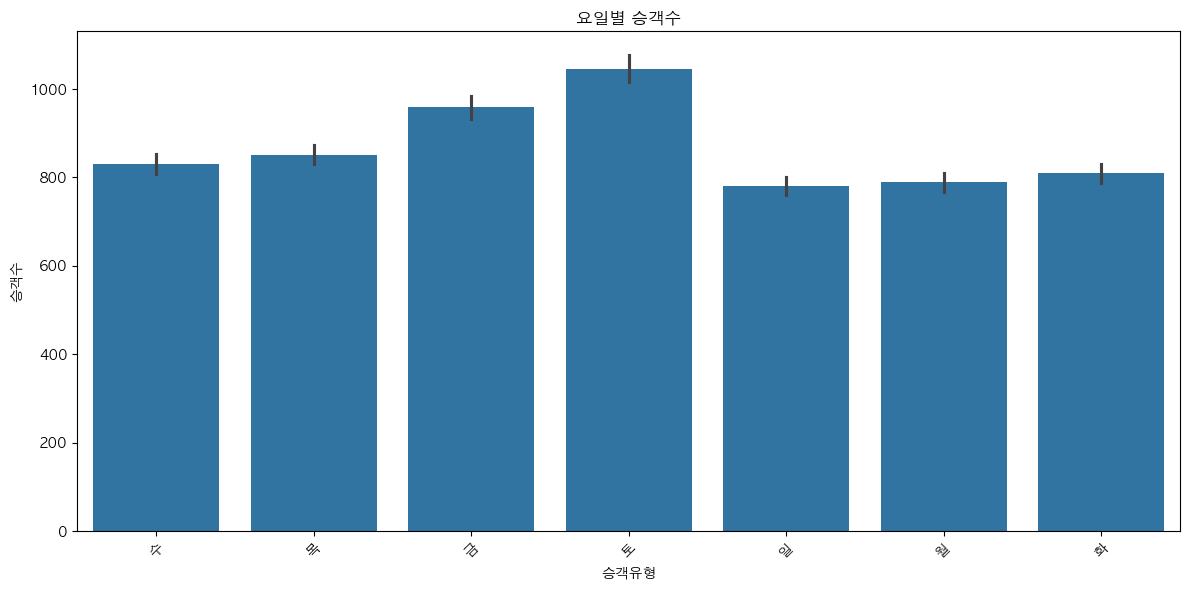

In [77]:
plt.figure(figsize=(12, 6))

# seaborn을 사용한 막대 그래프 생성
sns.barplot(data=hongdae_time, x='day', y='승객수')

# 그래프 제목과 레이블 설정
plt.title('요일별 승객수')
plt.xlabel('승객유형')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

---
### 승하차 합산

In [78]:
sum_hongdae = hongdae_time.groupby(['년', '월', 'date', 'day', 'time', '승객유형'], as_index=False)['승객수'].sum()
sum_hongdae.head()

KeyError: '년'

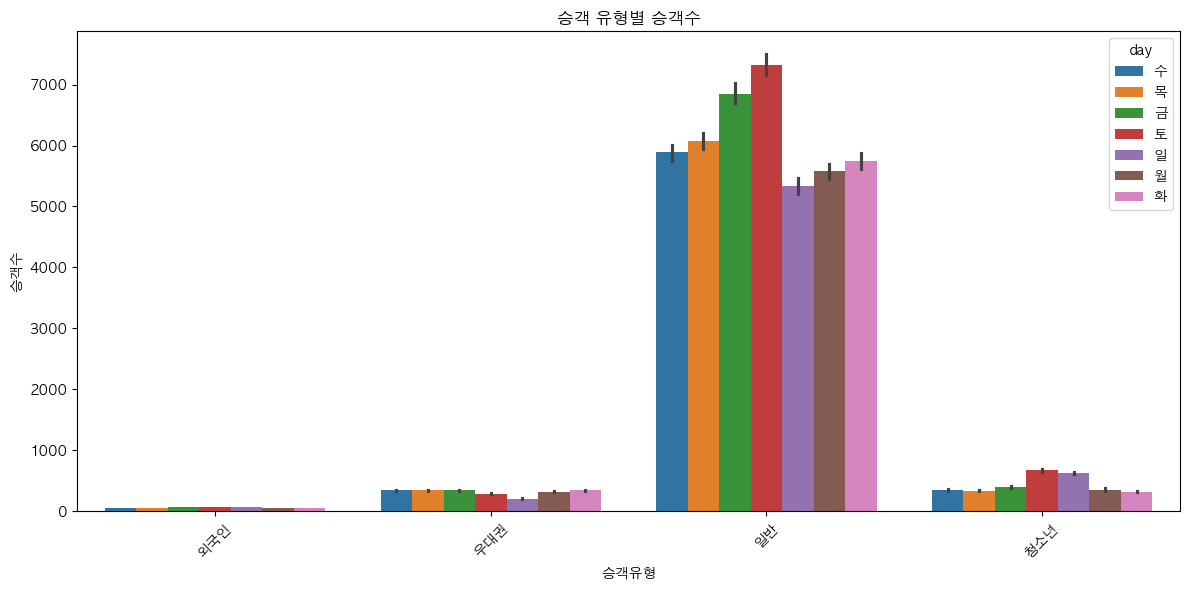

In [ ]:
plt.figure(figsize=(12, 6))

# seaborn을 사용한 막대 그래프 생성
sns.barplot(data=sum_hongdae, x='승객유형', y='승객수', hue='day')

# 그래프 제목과 레이블 설정
plt.title('승객 유형별 승객수')
plt.xlabel('승객유형')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_1602/2131303702.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sum_hongdae, x='승객유형', y='승객수', hue='day', ci=None)


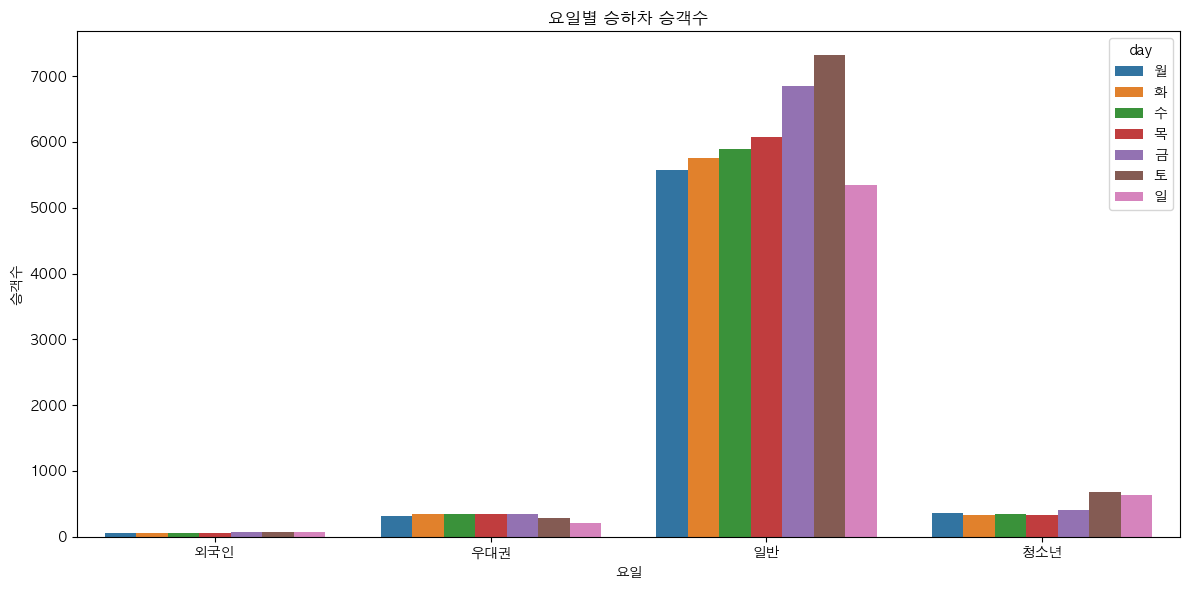

In [ ]:
# 요일 순서 지정
weekday_order = ['월', '화', '수', '목', '금', '토', '일']

# day 컬럼을 카테고리형으로 변환하고 순서 지정
sum_hongdae['day'] = pd.Categorical(sum_hongdae['day'], categories=weekday_order, ordered=True)

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# seaborn을 사용한 막대 그래프 생성
sns.barplot(data=sum_hongdae, x='승객유형', y='승객수', hue='day', ci=None)

# 그래프 제목과 레이블 설정
plt.title('요일별 승하차 승객수')
plt.xlabel('요일')
plt.ylabel('승객수')

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
days=["평일", "평일", "평일", "평일", "금", "토", "일"]

sum_hongdae['day']=sum_hongdae['date'].dt.weekday.map(dict(enumerate(days)))

In [ ]:
# # 요일 데이터 업데이트 함수 정의
def update_holiday(row):
    if row['date'] in kr_holidays or row['day'] == '일':
        return '일/공휴일'
    else:
        return row['day']  # 기존 요일 값 유지
    
# # 데이터프레임에 함수 적용
sum_hongdae['day'] = sum_hongdae.apply(update_holiday, axis=1)

In [ ]:
sum_hongdae.head()

,년,월,date,day,time,승객유형,승객수
0,2022,6,2022-06-01,일/공휴일,5,외국인,1.0
1,2022,6,2022-06-01,일/공휴일,5,우대권,97.0
2,2022,6,2022-06-01,일/공휴일,5,일반,1252.0
3,2022,6,2022-06-01,일/공휴일,5,청소년,46.0
4,2022,6,2022-06-01,일/공휴일,6,외국인,0.0


In [ ]:
sum_hongdae.day.unique()

array(['일/공휴일', '평일', '금', '토'], dtype=object)

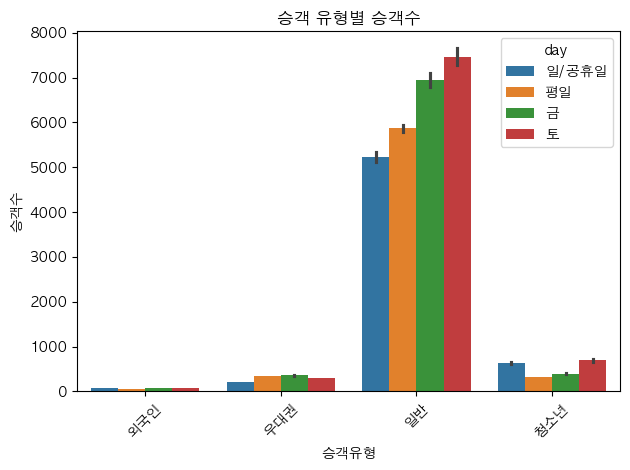

In [ ]:
sns.barplot(data=sum_hongdae, x='승객유형', y='승객수', hue='day')

# 그래프 제목과 레이블 설정
plt.title('승객 유형별 승객수')
plt.xlabel('승객유형')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

### 요일별 승객 유형의 차이
> 외국인: 월-목에 비해서는 금/토/일에 이용 인원이 많다.     
> 우대권: 주말에 비해서 월-금에 이용 인원이 많다.       
> 일반(20~64): 일/공휴일 인원이 가장 적고, 금요일에 이용 인원이 증가하며, 토요일에 이용 인원이 가장 많다.(타겟층이 너무 포괄적이라 정확한 경향 반영 X)      
> 청소년(미성년자): 월-금에 비해 토/일(공휴일)의 이용 인원이 확실하게 많다.

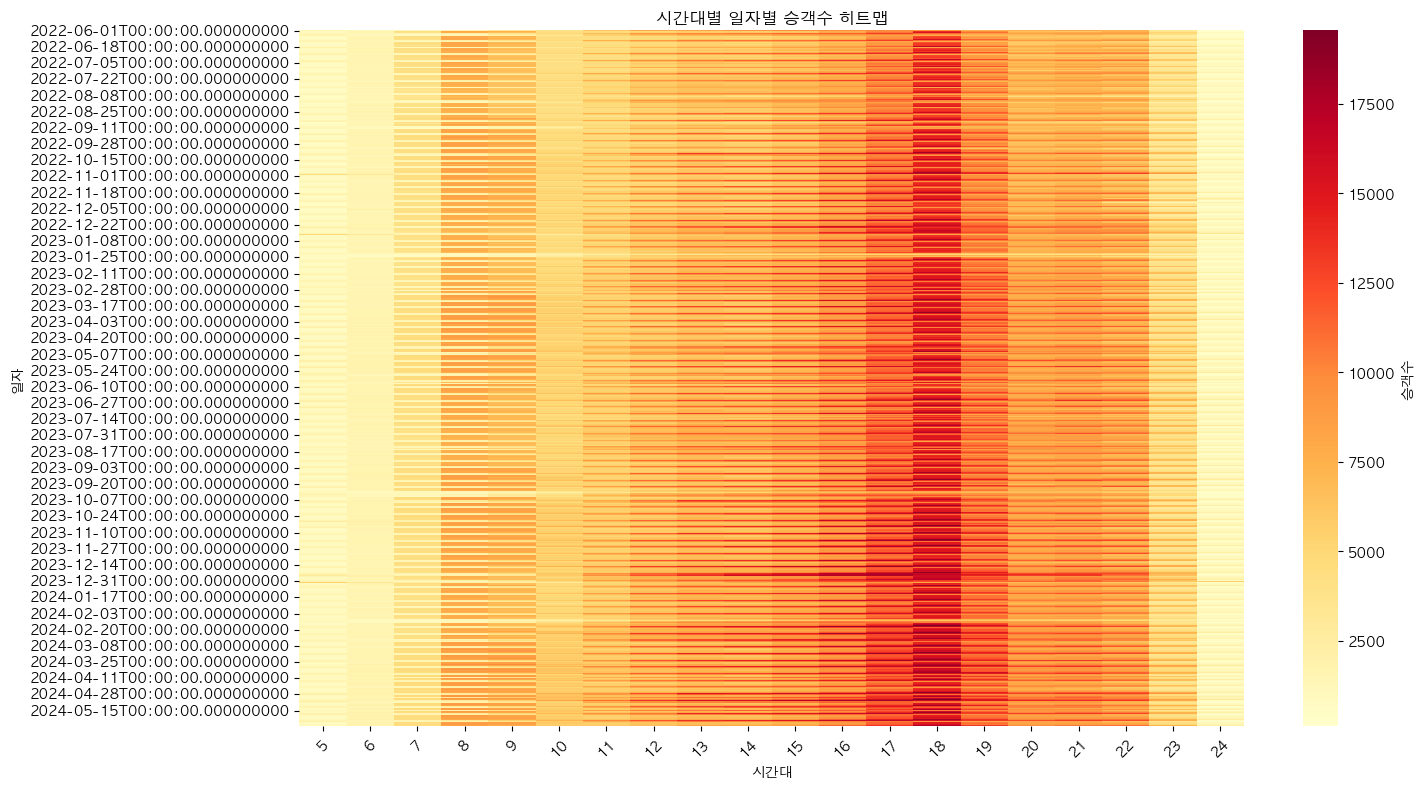

In [ ]:
# 피벗 테이블 생성
pivot_table = sum_hongdae.pivot_table(
    index='date',     
    columns='time', 
    values='승객수',
    aggfunc='sum',
)

# 히트맵 생성
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, 
            annot=False,          # 값 표시
            fmt='.0f',           # 소수점 없이 표시
            cmap='YlOrRd',       # 색상 맵 설정
            cbar_kws={'label': '승객수'})  #

# 그래프 제목과 레이블 설정
plt.title('시간대별 일자별 승객수 히트맵')
plt.xlabel('시간대')
plt.ylabel('일자')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

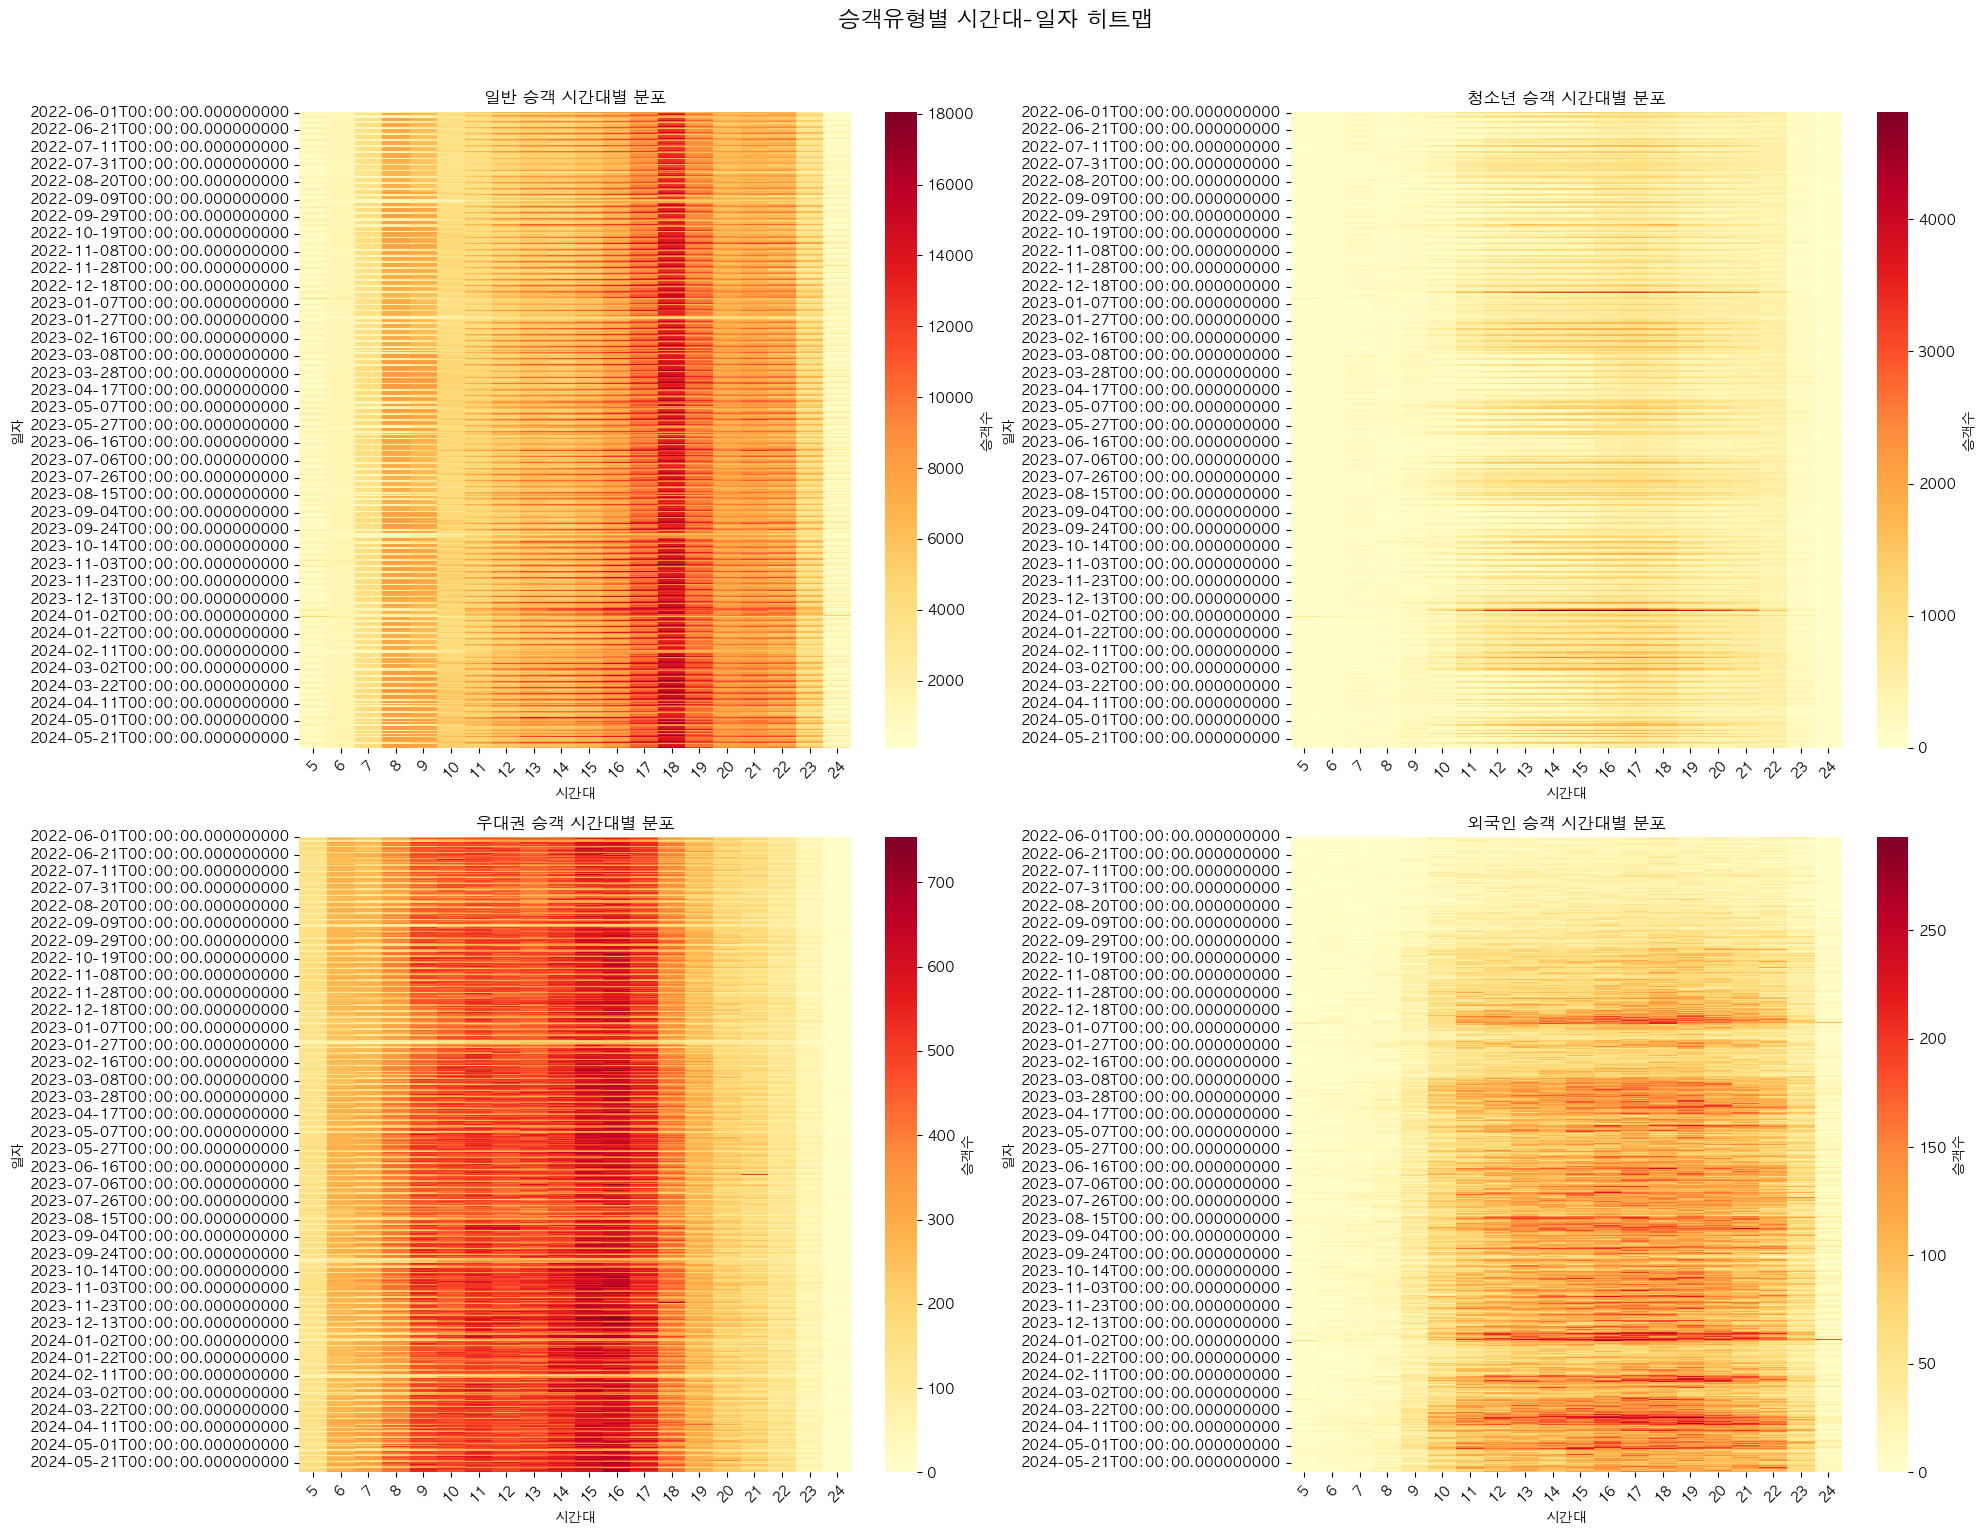

In [ ]:
# 승객유형 리스트
passenger_types = ['일반', '청소년', '우대권', '외국인']

# 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 각 승객유형별로 히트맵 생성
for idx, p_type in enumerate(passenger_types):
    # 해당 승객유형 데이터만 필터링
    type_data = sum_hongdae[sum_hongdae['승객유형'] == p_type]
    
    # 피벗 테이블 생성
    pivot_data = type_data.pivot_table(
        index='date',
        columns='time',
        values='승객수',
        aggfunc='sum',
        fill_value=0
    )
    
    # 서브플롯 위치 계산
    row = idx // 2
    col = idx % 2
    
    # 히트맵 그리기
    sns.heatmap(pivot_data,
                ax=axes[row, col],
                cmap='YlOrRd',
                annot=False,
                cbar_kws={'label': '승객수'})
    
    # 서브플롯 제목 설정
    axes[row, col].set_title(f'{p_type} 승객 시간대별 분포')
    axes[row, col].set_xlabel('시간대')
    axes[row, col].set_ylabel('일자')
    
    # x축 레이블 회전
    axes[row, col].tick_params(axis='x', rotation=45)

plt.suptitle('승객유형별 시간대-일자 히트맵', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

> 청소년 및 외국인 승객에 한해 계절의 영향이 있어 보인다.(청소년 방학기간/외국인 1-2월)

---
### 계절 컬럼 추가
- 방학시즌

In [ ]:
sum_hongdae['vac'] = sum_hongdae['월'].apply(lambda x: 1 if (7 <= x < 9 or 1 <= x < 3) else 0)

In [ ]:
sum_hongdae.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,일/공휴일,5,외국인,1.0,0
1,2022,6,2022-06-01,일/공휴일,5,우대권,97.0,0
2,2022,6,2022-06-01,일/공휴일,5,일반,1252.0,0
3,2022,6,2022-06-01,일/공휴일,5,청소년,46.0,0
4,2022,6,2022-06-01,일/공휴일,6,외국인,0.0,0


In [ ]:
sum_hongdae.head(50)

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,일/공휴일,5,외국인,1.0,0
1,2022,6,2022-06-01,일/공휴일,5,우대권,97.0,0
2,2022,6,2022-06-01,일/공휴일,5,일반,1252.0,0
3,2022,6,2022-06-01,일/공휴일,5,청소년,46.0,0
4,2022,6,2022-06-01,일/공휴일,6,외국인,0.0,0
5,2022,6,2022-06-01,일/공휴일,6,우대권,181.0,0
6,2022,6,2022-06-01,일/공휴일,6,일반,976.0,0
7,2022,6,2022-06-01,일/공휴일,6,청소년,40.0,0
8,2022,6,2022-06-01,일/공휴일,7,외국인,1.0,0
9,2022,6,2022-06-01,일/공휴일,7,우대권,125.0,0


In [ ]:
sum_hongdae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58480 entries, 0 to 58479
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       58480 non-null  int64         
 1   월       58480 non-null  int64         
 2   date    58480 non-null  datetime64[ns]
 3   day     58480 non-null  object        
 4   time    58480 non-null  int64         
 5   승객유형    58480 non-null  object        
 6   승객수     58480 non-null  float64       
 7   vac     58480 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.6+ MB


---
### 일반 분리 후 승객유형 열로 변환

**일반 분리 기준**  
- 요일별
- 시간대별
- vac(계절)별

In [ ]:
sum_hongdae.to_csv('../data/hongdae_1220.csv', index=False)